## Estimate the set from Racoons command:

### Step 1. Import the set

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

filename = '../data/raw/scraped_data.csv'

ds = pd.read_csv(filename,delimiter=',')

### See the head 

In [9]:
print( ds.shape )

col = 'Url'  # Drop the column 'Urlэб because it needn't for analysis
if col in ds.columns:
    ds.drop(columns=[col], inplace=True)
    
pd.set_option('display.expand_frame_repr', False)
print( ds.head(5).transpose() )


(10947, 17)
                             0          1                2                3           4
Property ID           RBU61383   RBU61403         RBU61404         RBU43493    RBU50579
Locality name          hoboken    merksem          wilrijk           deurne  borgerhout
Postal code             2660.0     2170.0           2610.0           2100.0      2140.0
Price                 299000.0   439000.0         264000.0         329000.0    340000.0
Type of property         house      house            house            house       house
Subtype of property  residence  residence        residence        residence   residence
Type of sale          standard   standard         standard         standard    standard
Number of rooms            3.0        4.0              2.0              4.0         2.0
Living area              176.0      189.0            107.0            139.0       187.0
Equipped kitchen             0          0                0                0           0
Furnished           

### Description of columns 

In [3]:
print( ds.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14688 entries, 0 to 14687
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   property_ID                    14688 non-null  object 
 1   locality_name                  11036 non-null  object 
 2   postal_code                    13349 non-null  float64
 3   type                           14688 non-null  object 
 4   subtype                        14688 non-null  object 
 5   price (€)                      14064 non-null  float64
 6   number_of_bedrooms             14406 non-null  float64
 7   living_area (m²)               13959 non-null  float64
 8   equiped_kitchen (yes:1, no:0)  14688 non-null  int64  
 9   furnished (yes:1, no:0)        14688 non-null  int64  
 10  open_fire (yes:1, no:0)        14688 non-null  int64  
 11  terrace (yes:1, no:0)          14688 non-null  int64  
 12  terrace_area (m²)              7394 non-null  

### Uniq values. 

In [4]:
print(ds.nunique())

print('\n\n')

print(ds['type'].value_counts())
print('\n')
print(ds['subtype'].value_counts())


property_ID                      14688
locality_name                     7385
postal_code                        849
type                                 6
subtype                             23
price (€)                         2503
number_of_bedrooms                  26
living_area (m²)                   565
equiped_kitchen (yes:1, no:0)        2
furnished (yes:1, no:0)              2
open_fire (yes:1, no:0)              2
terrace (yes:1, no:0)                2
terrace_area (m²)                  153
garden (yes:1, no:0)                 2
number_facades                       4
swimming_pool (yes:1, no:0)          2
state_of_building                    9
dtype: int64



type
Apartment     7358
House         7249
Business        39
Land            28
Investment      10
Garage           4
Name: count, dtype: int64


subtype
Apartment              6325
Residence              6155
Villa                   553
Ground floor            341
Penthouse               284
Mixed building          24

### By subtypes: 

In [5]:
table = ds.groupby(['type', 'subtype']).size().reset_index(name='count')
print(table)

          type              subtype  count
0    Apartment            Apartment   6325
1    Apartment               Duplex    223
2    Apartment         Ground floor    341
3    Apartment                 Loft     36
4    Apartment            Penthouse    284
5    Apartment               Studio    132
6    Apartment              Triplex     17
7     Business     Business surface      1
8     Business  Commercial building     24
9     Business         Office space     14
10      Garage               Garage      2
11      Garage              Parking      2
12       House             Bungalow     73
13       House               Chalet     85
14       House              Cottage     66
15       House              Mansion      9
16       House         Master house     65
17       House       Mixed building    243
18       House            Residence   6155
19       House                Villa    553
20  Investment  Investment property     10
21        Land     Development site     15
22        L

### rename columns. 

In [6]:
print( ds.info() )

#ds.rename(columns={ds.columns[5]: 'price'}, inplace=True)
ds.columns = (
    ds.columns
      .str.replace(r"\(.*?\)", "", regex=True)  # убрать всё в скобках, включая скобки
      .str.strip()                               # удалить пробелы по краям
      .str.replace(" ", "_")                     # заменить пробел на _
)

print('\n\n','New names:')
print( ds.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14688 entries, 0 to 14687
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   property_ID                    14688 non-null  object 
 1   locality_name                  11036 non-null  object 
 2   postal_code                    13349 non-null  float64
 3   type                           14688 non-null  object 
 4   subtype                        14688 non-null  object 
 5   price (€)                      14064 non-null  float64
 6   number_of_bedrooms             14406 non-null  float64
 7   living_area (m²)               13959 non-null  float64
 8   equiped_kitchen (yes:1, no:0)  14688 non-null  int64  
 9   furnished (yes:1, no:0)        14688 non-null  int64  
 10  open_fire (yes:1, no:0)        14688 non-null  int64  
 11  terrace (yes:1, no:0)          14688 non-null  int64  
 12  terrace_area (m²)              7394 non-null  

### Step 8. 

In [7]:
print(ds['state_of_building'].value_counts())


state_of_building
New                   5821
Normal                2562
Excellent             1227
To be renovated       1202
To renovate            369
Fully renovated        249
Under construction      23
To restore              10
To demolish              7
Name: count, dtype: int64


### See distribution of price 

In [8]:
pd.set_option('display.float_format', '{:.0f}'.format)

print( ds['price'].describe() )

count     14064
mean     367024
std      241720
min           1
25%      246400
50%      320753
75%      425000
max     8600002
Name: price, dtype: float64


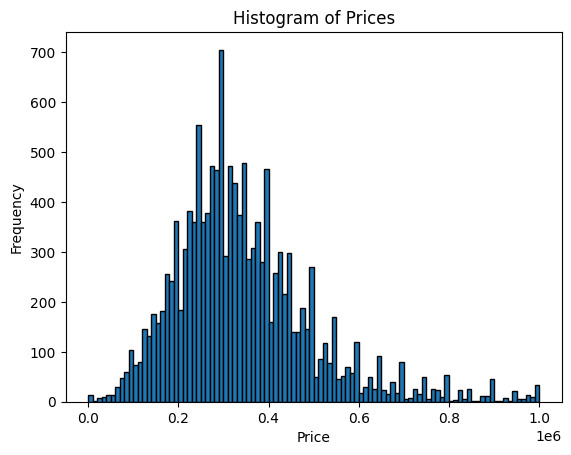

In [9]:
ds['price'].plot(kind='hist', bins=100, range=(1, 1e6), edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

### Modes. 

In [10]:
modes = ds['price'].mode()
print(modes)

0   299000
Name: price, dtype: float64


### Geopandas - build a clear map. 

<Axes: >

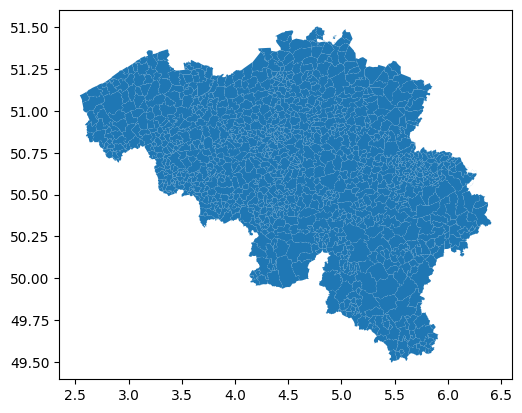

In [36]:
#  nouveau_PO

shp_name = './maps/Belgium-4-Digit-Postcodes-2020.shp'

gdf = gpd.read_file(shp_name)

gdf.plot()

In [12]:
ds_avg = ds.groupby('postal_code', as_index=False)['price'].median()
ds_avg.rename(columns={'price': 'median_price'}, inplace=True)
print(ds_avg)

     postal_code  median_price
0           1300        419000
1           1301        795000
2           1310        645000
3           1315        424552
4           1320        540000
..           ...           ...
844         9970        431024
845         9971        249000
846         9980        607000
847         9990        325000
848         9991        399000

[849 rows x 2 columns]


### Bind geoshape and median price

In [16]:
#gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(int)
#ds_avg['postal_code'] = ds_avg['postal_code'].astype(int)

gdf['nouveau_PO'] = pd.to_numeric(gdf['nouveau_PO'], errors='coerce').astype('Int64')
ds_avg['postal_code'] = pd.to_numeric(ds_avg['postal_code'], errors='coerce').astype('Int64')

gdf = gdf.merge(ds_avg, left_on='nouveau_PO', right_on='postal_code', how='left')

print (gdf.dtypes)


Join_Count           int32
nouveau_PO           Int64
FREQUENCY            int32
CP_speciau           int32
Shape_Leng         float64
Shape_Area         float64
geometry          geometry
postal_code_x      float64
median_price_x     float64
postal_code_y      float64
median_price_y     float64
postal_code          Int64
median_price       float64
dtype: object


### Build a color map of avg price 

Text(0.5, 1.0, 'Median Price by Postal Code in Belgium')

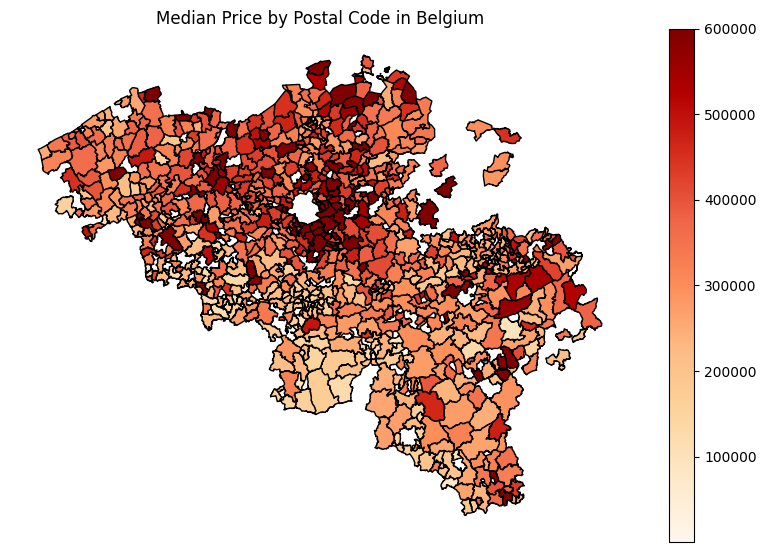

In [31]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=100, vmax=600000)

width_px, height_px = 1500, 1000
dpi = 150
figsize = (width_px / dpi, height_px / dpi)
fig, ax = plt.subplots(figsize=figsize)


gdf.plot(
    cmap='OrRd', 
    column='median_price_x', 
    legend=True,
    norm=norm,
    ax=ax,
    edgecolor='black')

plt.axis('off')
plt.title('Median Price by Postal Code in Belgium')


### Save in file 

In [39]:
fig.savefig('belgium_median_price_map.png', dpi=dpi, bbox_inches='tight')
plt.close(fig)